In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

# Track 2 (trajectories) 

## Ensemble metrics
File format: txt file with first with format:

model: name_model \
$\mu_\alpha^1$;   $\mu_\alpha^2$ ;     ... \
$\sigma_\alpha^1$;  $\sigma_\alpha^2$ ; ...  \
$\mu_D^1$ ;        $\mu_D^2$ ;         ...  \
$\sigma_D^1$ ;      $\sigma_D^2$ ;     ... \
$N_1$, $N_2$, ... 

where $\mu_i$ is the mean and $\sigma_i$ the variance of the distribution of state $i$ and $N_i$ the number of counts of that state. The name of the model has to be chosen between :

['single_state',  'multi_state', 'immobile_traps', 'dimerization', 'confinement']

### Read data distribution data

In [5]:
# skip row one, which has the name_model
true = np.loadtxt('data/ens_labs_exp_3_fov_0.txt', skiprows=1, delimiter = ';')
pred = np.loadtxt('data/ens_labs_exp_0_fov_0.txt', skiprows=1, delimiter = ';')

### Implement distribution metrics

In [7]:
from andi_datasets.utils_challenge import error_Ensemble_dataset

In [8]:
mae_alpha, mae_D, dist = error_Ensemble_dataset(pred, true, return_distributions=True)

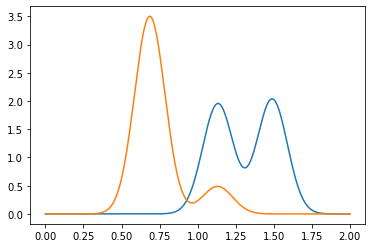

In [10]:
alpha = np.linspace(0, 2, 1000)
plt.plot(alpha, dist[0], label = 'True')
plt.plot(alpha, dist[2], label = 'Label')

# Single trajectory metric

In [9]:
from andi_datasets.utils_challenge import load_file_to_df

pred_path = 'data/traj_labs_exp_0_fov_0.txt'
true_path = 'data/traj_labs_exp_1_fov_0.txt'

df_pred = load_file_to_df(pred_path)
df_true = load_file_to_df(true_path)

In [40]:
df_pred.head()

,traj_idx,Ds,alphas,states,changepoints
0,0.0,[0.7950740993404785],[0.912948843416798],[2.0],[94.0]
1,1.0,[0.7950740993404785],[0.912948843416798],[2.0],[170.0]
2,2.0,[0.7950740993404785],[0.912948843416798],[2.0],[56.0]
3,3.0,[0.7950740993404785],[0.912948843416798],[2.0],[56.0]
4,4.0,[1.2026014336378474],[1.1614583596440688],[2.0],[500.0]


In [12]:
df_true.head()

,traj_idx,Ds,alphas,states,changepoints
0,0.0,"[0.21464314015344688, 1.1286836478394626]","[0.4716396783636228, 0.8710651587536685]","[2.0, 2.0]","[77.0, 111.0]"
1,1.0,"[0.0069271977428376555, 0.9882246436309391, 0....","[0.4613206792192617, 1.0371770903232511, 0.461...","[2.0, 2.0, 2.0, 2.0, 2.0]","[180.0, 345.0, 423.0, 474.0, 500.0]"
2,2.0,"[1.008128547168054, 0.040802363494562455, 1.00...","[0.840426898360738, 0.367609202369319, 0.84042...","[2.0, 2.0, 2.0]","[159.0, 396.0, 500.0]"
3,3.0,[0.0697340173088659],[0.49832556036814646],[2.0],[76.0]
4,4.0,"[1.014620114003425, 0.0697340173088659, 1.0146...","[0.8867132931680539, 0.49832556036814646, 0.88...","[2.0, 2.0, 2.0]","[28.0, 69.0, 79.0]"


In [15]:
from andi_datasets.utils_challenge import error_SingleTraj_dataset
rmse_CP, JI, error_alpha, error_D, error_s = error_SingleTraj_dataset(df_true = df_true, df_pred = df_pred, prints = True)

  0%|          | 0/65 [00:00<?, ?it/s]

Summary of metrics assesments:

Changepoint Metrics 
RMSE: 4.892 
Jaccard Index: 0.053 

Diffusion property metrics 
Metric anomalous exponent: 0.29279463343586426 
Metric diffusion coefficient: 0.1523555602731029 
Metric diffusive state: 1.0
